# Multiple Subplots and Annotations

This notebook covers how to create figures with multiple subplots and how to add text and annotations to your visualizations.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime

plt.style.use('seaborn-v0_8-whitegrid')

## Multiple Subplots

It's often useful to display several plots in one figure. Matplotlib provides a few ways to do this.

### `plt.subplot`: Simple Grids
The `plt.subplot()` function creates a simple grid of subplots. You specify the number of rows, columns, and the index of the plot you want to create.

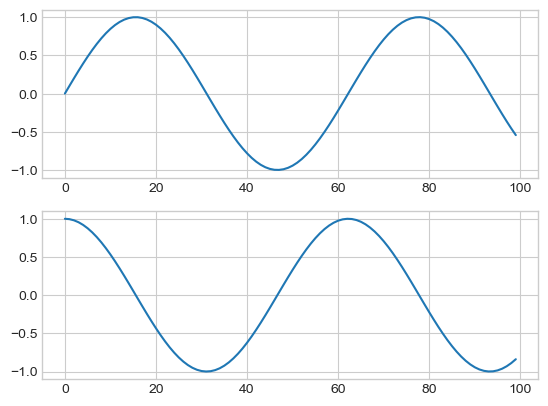

In [3]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1) # 2 rows, 1 column, plot 1
ax1.plot(np.sin(np.linspace(0, 10, 100)))

ax2 = fig.add_subplot(2, 1, 2) # 2 rows, 1 column, plot 2
ax2.plot(np.cos(np.linspace(0, 10, 100)))

plt.show()

### `plt.subplots`: The Whole Grid in One Go
The `plt.subplots()` function is more common and generally recommended. It creates the entire grid at once and returns a figure object and an array of axes objects.

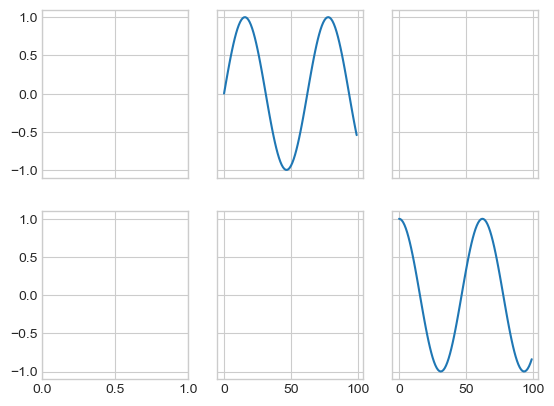

In [4]:
# Create a 2x3 grid of subplots
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

# ax is a 2D numpy array, so we can access each subplot by index
ax[0, 1].plot(np.sin(np.linspace(0, 10, 100)))
ax[1, 2].plot(np.cos(np.linspace(0, 10, 100)))

plt.show()

### `plt.GridSpec`: More Complicated Arrangements
For non-uniform subplot layouts, `GridSpec` gives you more control.

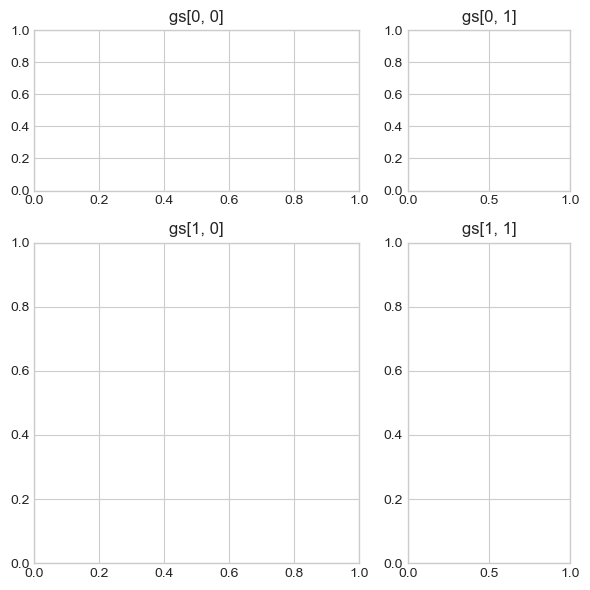

In [5]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(6, 6))
gs = GridSpec(2, 2, width_ratios=[2, 1], height_ratios=[1, 2])

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])

ax1.set_title('gs[0, 0]')
ax2.set_title('gs[0, 1]')
ax3.set_title('gs[1, 0]')
ax4.set_title('gs[1, 1]')

fig.tight_layout()
plt.show()

## Text and Annotation

You can add text and annotations to your plots to provide more context.

### `ax.text` and `ax.annotate`
`ax.text` simply adds text at a given x/y coordinate. `ax.annotate` is more advanced, allowing you to create an arrow that points from the text to a specific feature on the plot.

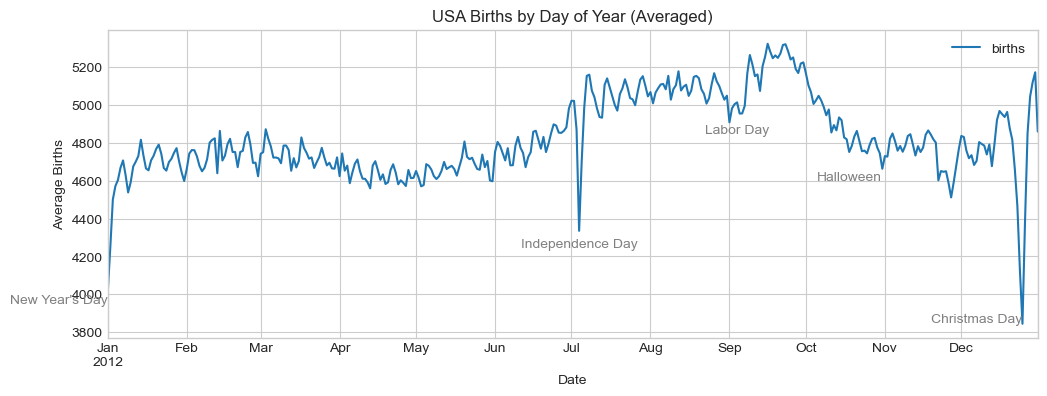

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

births = pd.read_csv('../data/births.csv')

# Prepare the data
quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

# Set a proper datetime index
# Combine year, month, and day into a single datetime object
births.index = pd.to_datetime(births[['year', 'month', 'day']])

# Get the average births for each day of the year
births_by_date = births.pivot_table('births', index=[births.index.month, births.index.day])

# Create a new index for plotting using a leap year (2012) to handle Feb 29
births_by_date.index = [datetime(2012, month, day)
                        for (month, day) in births_by_date.index]

# Plot the data
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add annotations for a few holidays
style = dict(size=10, color='gray')

ax.text(datetime(2012, 1, 1), 3950, "New Year's Day", **style, ha='right')
ax.text(datetime(2012, 7, 4), 4250, "Independence Day", **style, ha='center')
ax.text(datetime(2012, 9, 4), 4850, "Labor Day", **style, ha='center')
ax.text(datetime(2012, 10, 31), 4600, "Halloween", **style, ha='right')
ax.text(datetime(2012, 12, 25), 3850, "Christmas Day", **style, ha='right')

# Format the plot
ax.set_title('USA Births by Day of Year (Averaged)')
ax.set_xlabel('Date')
ax.set_ylabel('Average Births')
plt.show()

### Arrows and Annotation
You can use `ax.annotate` to create arrows that point to specific features.

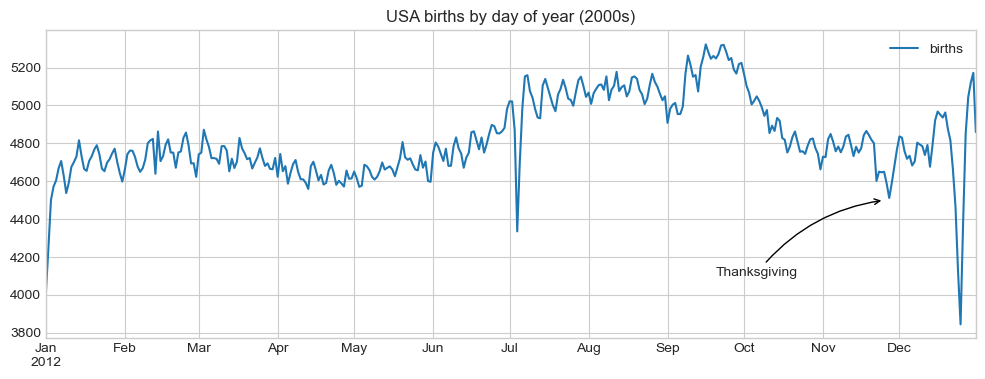

In [10]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Annotate with an arrow
ax.annotate('Thanksgiving', xy=('2012-11-25', 4500), xytext=('2012-9-20', 4100),
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.2"))

ax.set_title('USA births by day of year (2000s)')
plt.show()